In [13]:
%autosave 60

Autosaving every 60 seconds


In [2]:
import numpy as np
import pandas as pd
import seaborn
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [3]:
jeux=pd.read_csv('C:/Users/ludo1/Python for Data analysis/TD1/Video_Games_Sales_as_at_22_Dec_2016.csv',error_bad_lines=False )

b'Skipping line 950: expected 16 fields, saw 17\nSkipping line 1091: expected 16 fields, saw 17\nSkipping line 1633: expected 16 fields, saw 17\nSkipping line 1839: expected 16 fields, saw 19\nSkipping line 2888: expected 16 fields, saw 17\nSkipping line 2945: expected 16 fields, saw 18\nSkipping line 3026: expected 16 fields, saw 17\nSkipping line 3105: expected 16 fields, saw 19\nSkipping line 3218: expected 16 fields, saw 18\nSkipping line 3355: expected 16 fields, saw 19\nSkipping line 3447: expected 16 fields, saw 18\nSkipping line 3512: expected 16 fields, saw 19\nSkipping line 3567: expected 16 fields, saw 17\nSkipping line 3568: expected 16 fields, saw 17\nSkipping line 3745: expected 16 fields, saw 17\nSkipping line 3905: expected 16 fields, saw 18\nSkipping line 3976: expected 16 fields, saw 18\nSkipping line 4059: expected 16 fields, saw 18\nSkipping line 4108: expected 16 fields, saw 18\nSkipping line 4181: expected 16 fields, saw 17\nSkipping line 4377: expected 16 fields,

In [5]:
jeux

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating;
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E;
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,;
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E;
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E;
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,;
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16605,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,;
16606,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,;
16607,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,;
16608,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,;


In [6]:
jeux.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating;             object
dtype: object

In [7]:
# En regardant rapidement la base de donnée on se rend compte que pas mal de jeux on des donnée manquantes nous allons donc conserver seulement les jeux ayant toute leurs informations
jeux2=jeux
jeux=jeux.dropna()
jeux
# Nous conservons donc à la fin environ 6500 jeux

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating;
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E;
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E;
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E;
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E;
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E;
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16568,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,Criterion Games,M;
16587,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M;
16591,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games,T;
16597,STORM: Frontline Nation,PC,2011.0,Strategy,Unknown,0.00,0.01,0.00,0.00,0.01,60.0,12.0,7.2,13.0,SimBin,E10+;


# Analyse rapide 

In [8]:

top100=jeux.sort_values(by="Global_Sales")
VenteAP=jeux.pivot_table('Global_Sales',index="Year_of_Release",columns="Platform",aggfunc=sum)
VenteAP

Platform,3DS,DC,DS,GBA,GC,PC,PS,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
Year_of_Release,,,,,,,,,,,,,,,,,
1988.0,NaN,NaN,NaN,NaN,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992.0,NaN,NaN,NaN,NaN,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994.0,NaN,NaN,NaN,NaN,NaN,NaN,1.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996.0,NaN,NaN,NaN,NaN,NaN,1.59,17.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997.0,NaN,NaN,NaN,NaN,NaN,4.12,31.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998.0,NaN,NaN,NaN,NaN,NaN,0.10,45.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999.0,NaN,2.04,NaN,NaN,NaN,0.11,49.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000.0,NaN,1.98,NaN,NaN,NaN,3.18,44.12,29.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.99,NaN
2001.0,NaN,0.53,NaN,36.63,25.36,5.38,18.15,144.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.49,NaN


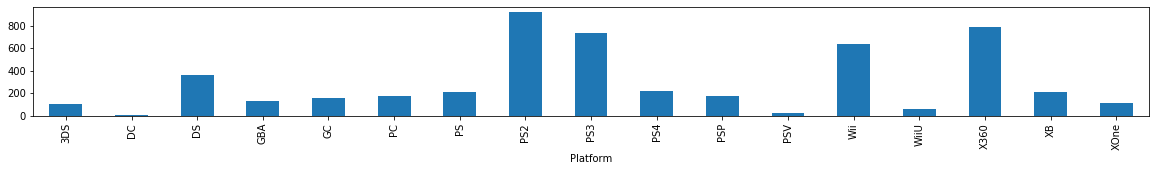

In [56]:
#Quel sont les ventes total de chaque plateform
fig = plt.figure(1, figsize=(20, 2))
jeux.groupby("Platform").Global_Sales.sum().plot(kind="bar")

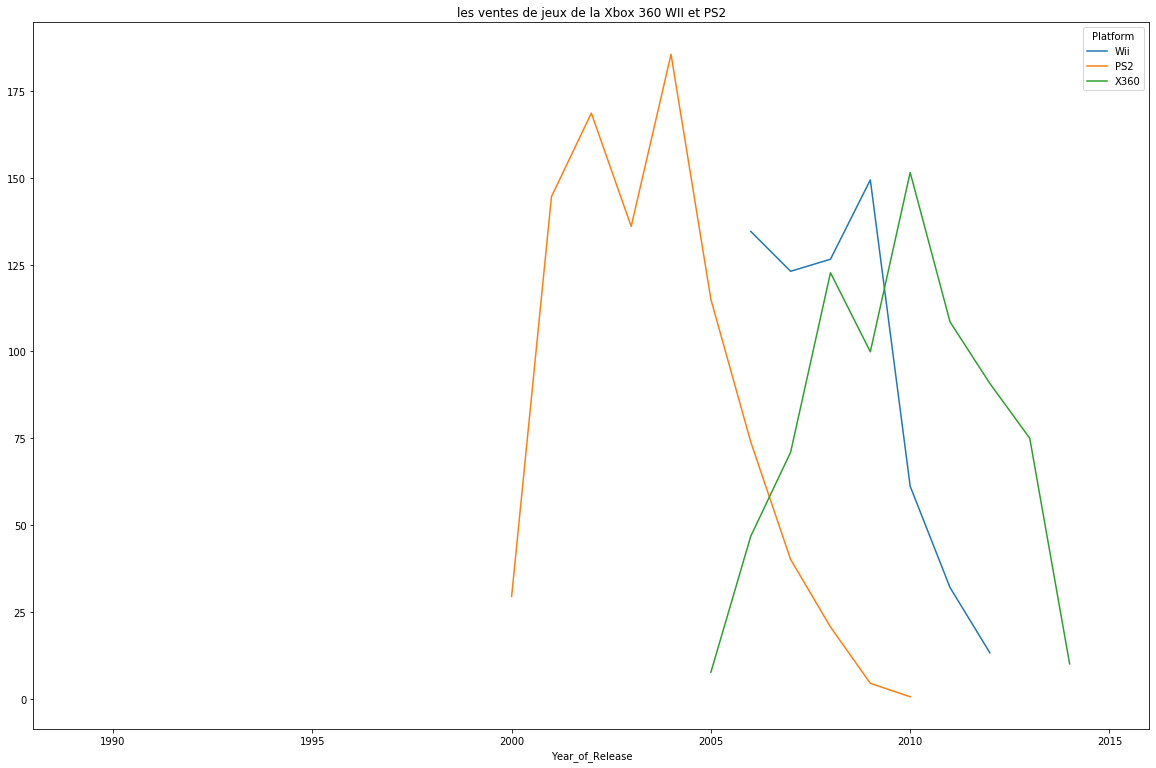

In [57]:
# Quel sont les vente par année de la Wii PS2 et X360
liste=["Wii","PS2","X360"]
subset=VenteAP[liste]
subset.plot(figsize=(20,13),grid=False,title="les ventes de jeux de la Xbox 360 WII et PS2")

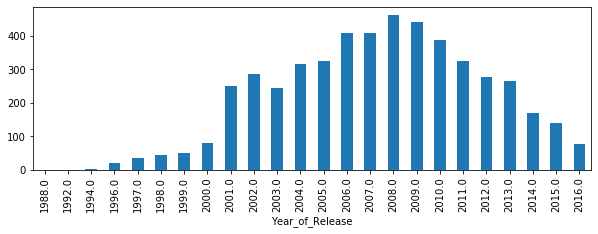

In [58]:
# Quel sont les meilleur ventes par année
fig = plt.figure(1, figsize=(10, 3))
jeux.groupby("Year_of_Release").Global_Sales.sum().plot(kind="bar")

In [59]:
#Combien de jeux par ESRB on été vendus chaque année?
VenteYR=jeux.pivot_table('Global_Sales',index="Year_of_Release",columns="Rating;",aggfunc=sum)

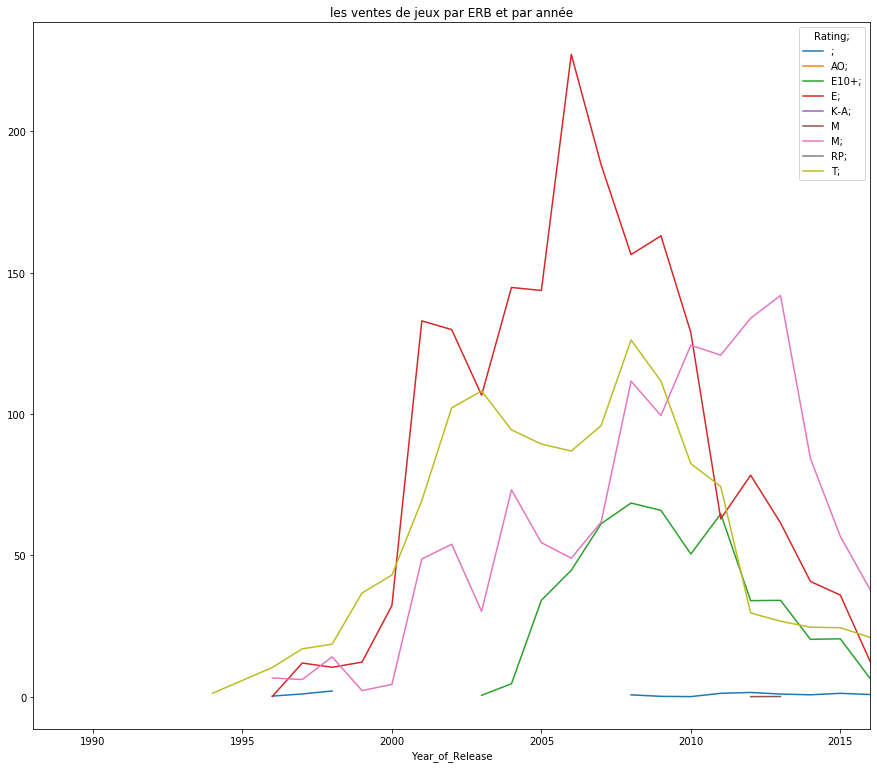

In [60]:
VenteYR.plot(figsize=(15,13),grid=False,title="les ventes de jeux par ERB et par année")

In [49]:
VenteRP=jeux[(jeux.Year_of_Release==2006.0) | (jeux.Year_of_Release==2007.0)  ].pivot_table('Name',index="Rating;",columns="Platform",aggfunc='count')

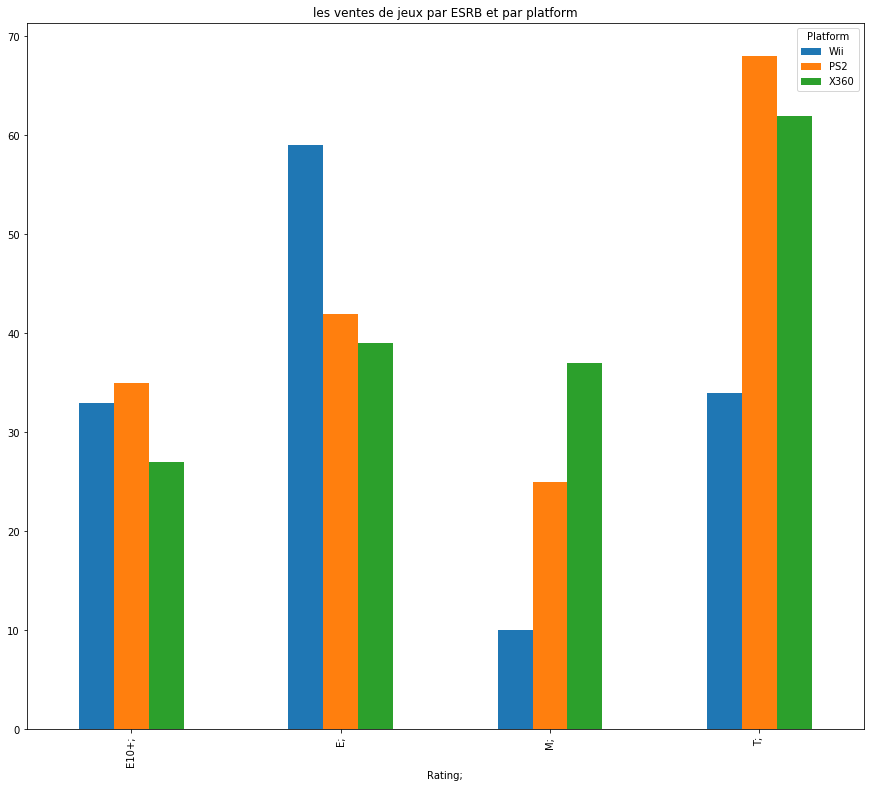

In [50]:
liste=["Wii","PS2","X360"]
subset2=VenteRP[liste]
subset2.plot(figsize=(15,13),grid=False,title="les ventes de jeux par ESRB et par platform",kind='bar')

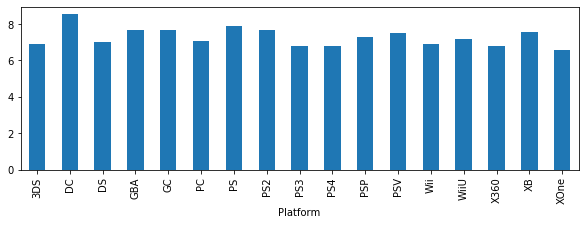

In [9]:
# Quel est la plateform la plus aprécié en moyenne par les utilisateur 
fig = plt.figure(1, figsize=(10, 3))
jeux.groupby("Platform").User_Score.mean().plot(kind='bar')